# **Datos Perdidos: Clase sobre Manejo de Datos Perdidos en Python**

---
Materia: Programación para Analítica Descriptiva y Predictiva

Unidad 02: Análisis Descriptivo de los Datos

Maestría en Inteligencia Artificial y Analítica de Datos

Universidad Autónoma de Ciudad Juárez

---

### Objetivo de la sesión:
El objetivo de esta sesión es que los estudiantes adquieran conocimientos y habilidades prácticas para identificar, manejar y resolver problemas relacionados con datos perdidos en conjuntos de datos, utilizando herramientas y métodos avanzados disponibles en Python.

### Introducción a los Datos Perdidos

Definición:
Los datos perdidos son observaciones o registros incompletos en un conjunto de datos, que pueden ocurrir por múltiples razones, como errores de captura, pérdida de información o problemas técnicos durante la recopilación.

Ventajas de manejar adecuadamente datos perdidos:
- Mejora la calidad y confiabilidad del análisis.
- Aumenta la precisión de modelos estadísticos y predictivos.

Desventajas de no manejar datos perdidos:
- Resultados sesgados o erróneos.
- Reducción del poder estadístico debido a la pérdida de información valiosa.


### Bibliotecas que manejaremos en esta sesión

Numpy, Pandas, Maplotlib y Seaborn


In [ ]:
# Importación de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Detección de Datos Perdidos

Existen 4 formas:

## 1. `df.info()`

Podemos comparar el número total de filas/instancias que tiene el conjunto de datos vs. cada columna. Todos deben ser iguales.


In [ ]:
#Cargamos la base de datos
df = pd.read_csv('drive/MyDrive/Unidad02/Airdata.csv')

print("Tamaño del conjunto de datos: cantidad de filas y columnas")
print(df.shape)
print("\n")
print("Información del conjunto de datos")
print(df.info())


Tamaño del conjunto de datos: cantidad de filas y columnas
(8784, 8)


Información del conjunto de datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DateTime        8784 non-null   object 
 1   Temperature     8784 non-null   float64
 2   Humidity        8784 non-null   int64  
 3   Wind_Speed      8784 non-null   float64
 4   Wind_Direction  8784 non-null   float64
 5   NO2_Location_A  8664 non-null   float64
 6   NO2_Location_B  8204 non-null   float64
 7   NO2_Location_C  8652 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 549.1+ KB
None


### Práctica

**Instrucciones**: Carga el archivo **health_nutrition** disponible en Teams en tu Drive. Usa las instrucciones anteriores para leer dicho archivo como un dataframe y  determinar la cantidad de valores pérdidos. Utiliza otro nombre alternativo a **df.**  

## 2. `df.isna()` o `df.isnull()`

Encuentra los valores perdidos y devuelve como resultado una lista de valores booleanos, True/False.

Si el conjunto de datos es muy grande, se sugiere mejor usar en combinación con `sum()`y `mean()`. De otra manera, te imprimiría una matriz del tamaño del conjunto original con datos verdaderos y falsos.



In [ ]:
#Dataframe de Ejemplo para ver la matriz de valores lógicos
df_small = pd.DataFrame({
    'A': [1, np.nan, 3],
    'B': [4, 5, None],
    'C': ['Rojo', 'Verde', None]
})

print("Conjunto de datos original")
print(df_small)
print("\n")
print("Matriz de valores lógicos")
print(df_small.isnull())

print("\n")
print("Puedo imprimir una columna en particula")
print(df_small['A'].isnull())
print("\n")


#Para conjuntos de datos muy grande usamos sum y mean

print("\n")
print("Cantidad de Datos Perdidos  en  un Conjunto de Datos con Varias Columnas")
print(df.isnull().sum())
print("\n")
print("Porcentaje de Datos Perdidos en un Conjunto de Datos con Varias")
print(df.isnull().mean())



Conjunto de datos original
     A    B      C
0  1.0  4.0   Rojo
1  NaN  5.0  Verde
2  3.0  NaN   None


Matriz de valores lógicos
       A      B      C
0  False  False  False
1   True  False  False
2  False   True   True


Puedo imprimir una columna en particula
0    False
1     True
2    False
Name: A, dtype: bool




Cantidad de Datos Perdidos  en  un Conjunto de Datos con Varias Columnas
DateTime            0
Temperature         0
Humidity            0
Wind_Speed          0
Wind_Direction      0
NO2_Location_A    120
NO2_Location_B    580
NO2_Location_C    132
dtype: int64


Porcentaje de Datos Perdidos en un Conjunto de Datos con Varias
DateTime          0.000000
Temperature       0.000000
Humidity          0.000000
Wind_Speed        0.000000
Wind_Direction    0.000000
NO2_Location_A    0.013661
NO2_Location_B    0.066029
NO2_Location_C    0.015027
dtype: float64


### Práctica

**Usa el conjunto de datos health_nutrition** que cargaste anteriormente y emplea las funciones vistas arriba para mostrar la cantidad de datos perdidos, así como la media de dichos datos.

## 3. Visualización:

Podemos usar de matplotlib o seaborn: mapa de calor, histogramas

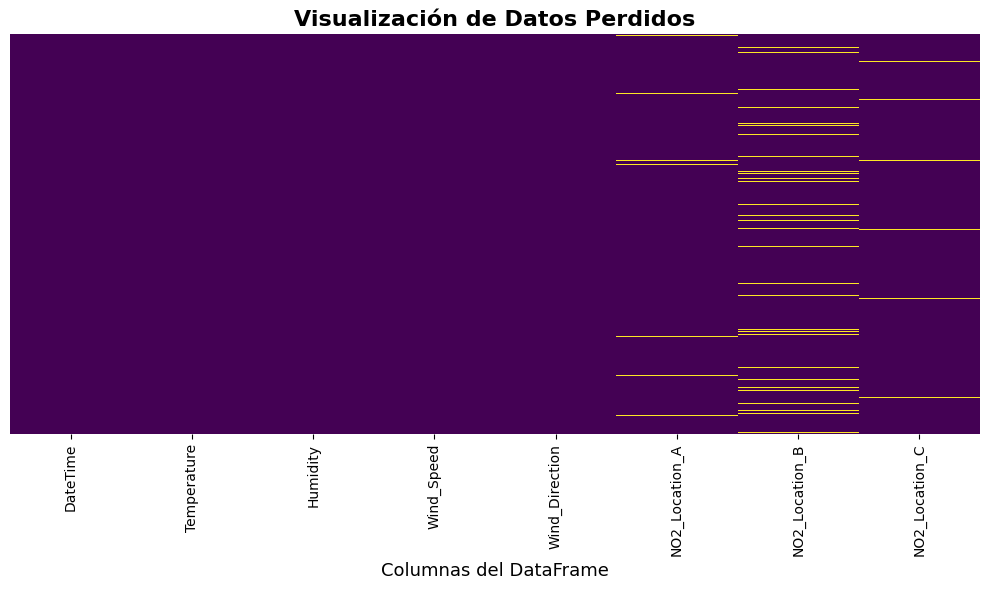

In [ ]:
#Mapa de Calor con Seaborn
plt.figure(figsize=(10, 6))  # Ajustar tamaño del gráfico
sns.heatmap(df.isnull(),
            cbar=False,
            cmap='viridis',
            yticklabels=False)  # Ocultar etiquetas en filas para mayor claridad
plt.title('Visualización de Datos Perdidos', fontsize=16, fontweight='bold')
plt.xlabel('Columnas del DataFrame', fontsize=13)
plt.tight_layout()  # Mejora la distribución del gráfico
plt.show()


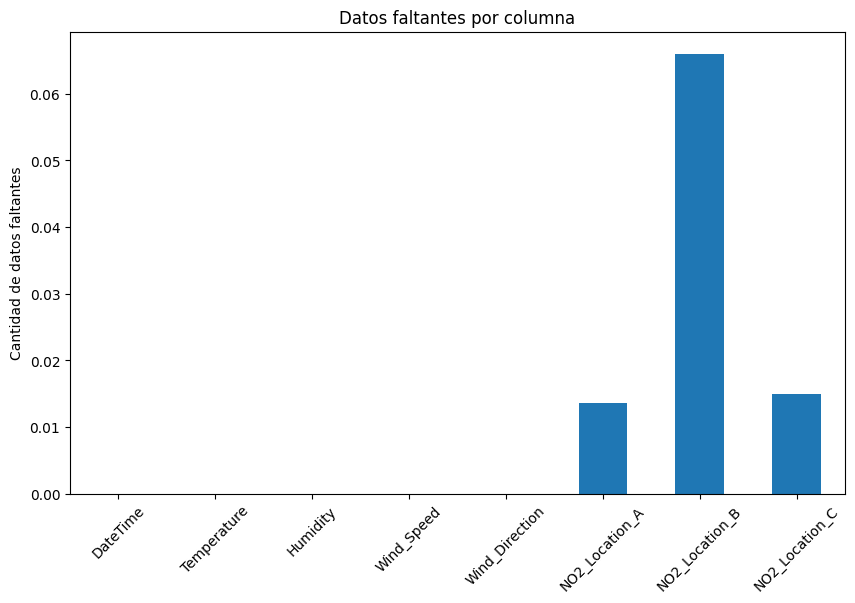

In [ ]:
#Histograma de Datos Perdidos por columna

# Configurar tamaño de figura
plt.figure(figsize=(10, 6))

df.isnull().mean().plot.bar()
plt.ylabel('Cantidad de datos faltantes')

# Rotar etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45)
plt.title('Datos faltantes por columna')
plt.show()



### Práctica
**Usa el conjunto de datos health_nutrition** que cargaste anteriormente y emplea las funciones de visualización de mapa de calor y de histograma para mostrar los datos perdidos.

## 4. Biblioteca `Missingno`

`missingno` es una biblioteca especializada en datos perdidos.

In [1]:
import missingno as msno

msno.matrix(df)
plt.show()


msno.bar(df)
plt.title('Cantidad de datos perdidos por columna')
plt.show()


msno.heatmap(df)
plt.title('Correlación entre columnas (datos faltantes)')
plt.show()

NameError: name 'df' is not defined

### Práctica

**Usa el conjunto de datos health_nutrition** que cargaste anteriormente y emplea la biblioteca `missingno`.

## Estrategias para Tratar con los Datos Perdidos


Podemos hablar de tres estrategias:



1.   Si no es un dato perdido, se puede llenar la celda con "No Aplica". Esto no se considera una estrategia de datos perdidos.
2.   Versión simple: Eliminar Filas y Columnas con datos perdidos
3. Técnicas de Imputación: Estadísticas, Aprendizaje Automático, Híbrida

En la literatura existe una gran diversidad de técnicas de imputación. La siguiente figura muestra una taxonomía de las estrategias existentes.

Tomada de Afkanpour et al. Conceptual framework as a guide to choose appropiate imputation method for missing values in a clinical structured dataset. BMC Medical Research Methdology 25, 43, 2025. [DOI de Artículo](https://doi.org/10.1186/s12874-025-02496-3)



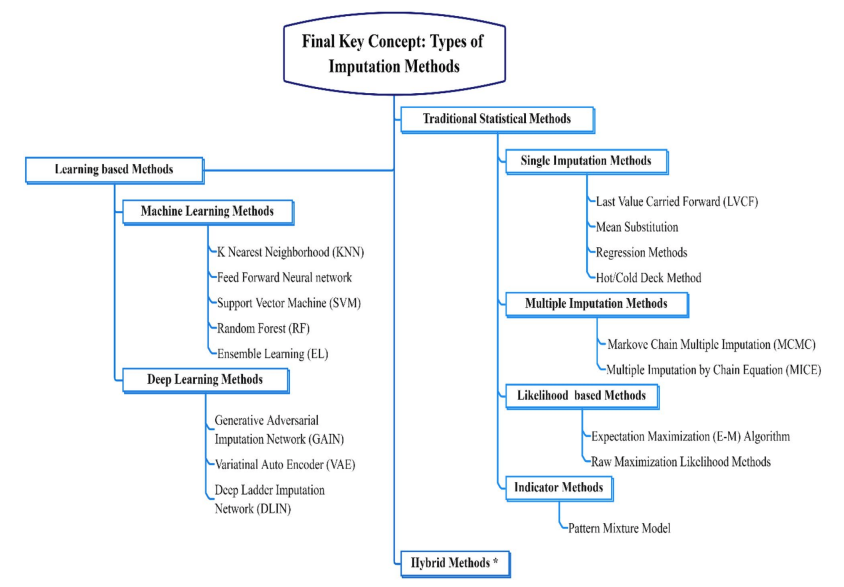




## Versión simple

Para eliminar filas o columnas con valores perdidos se usa la función de Pandas `df.dropna()`.

La sintaxis básica es `df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)`

Donde los parámetros son:

* `axis=0` (por defecto): Elimina filas con valores faltantes.
* `axis=1`: Elimina columnas con valores faltantes.
* `how='any'` (por defecto): Elimina la fila o columna si al menos un valor es NaN.
* `how='all'`: Solo elimina la fila o columna si todos sus valores son NaN.
* `thresh=n`: Mantiene filas/columnas que tengan al menos n valores no nulos.
* `subset=['col1', 'col2']`: Solo verifica ciertas columnas para eliminar filas con NaN.
* `inplace=True`: Modifica el DataFrame original en lugar de devolver una copia

Veamos un ejemplo sencillo para ejemplificar

In [ ]:
import pandas as pd
import numpy as np

df2 = pd.DataFrame({
    'A': [1, np.nan, 3, 4, 12, 15],
    'B': [5, 6, np.nan, 8, 13, None],
    'C': [9, 10, 11, np.nan, 14,17]
})

print("DataFrame original:")
print(df2)

#axis = 0 por defecto por lo que solo elimina filas
df_sin_nulos = df2.dropna()
print("\nDataFrame después de dropna() en filas:")
print(df_sin_nulos)


#axis = 1  solo elimina columnas
#Observa que queda vacío
df_sin_nulos = df2.dropna(axis=1)
print("\nDataFrame después de dropna(axis=1) en columnas:")
print(df_sin_nulos)

#axis = 1  solo elimina columas y con how='all' solo elimina si todos sus valores son NaN
#observa que no se elimina ninguna columna
df_sin_nulos = df2.dropna(axis=1, how="all")
print("\nDataFrame después de dropna(axis=1, how='all') en columnas:")
print(df_sin_nulos)

df3 = pd.DataFrame({
    'A': [1, np.nan, 3, np.nan],  # 2 valores NO nulos → SE MANTIENE
    'B': [np.nan, 6, np.nan, 8],  # 2 valores NO nulos → SE MANTIENE
    'C': [9, np.nan, np.nan, np.nan],  # 1 valor NO nulo → SE ELIMINA
    'D': [np.nan, np.nan, np.nan, np.nan]  # 0 valores NO nulos → SE ELIMINA
})

print("DataFrame original:")
print(df3)

#axis = 0  y thresh = 2
#observa que elimina C  y D porque tienen más de  2valores nulos
df_sin_nulos = df3.dropna(axis=1,thresh=2)
print("\nDataFrame después de dropna(axis=1, thresh=2) en columnas:")
print(df_sin_nulos)

print("\n")
#Puedo usar proporciones
umbral = len(df3) * 0.5
print("umbral:", umbral)
df_sin_nulos = df3.dropna(axis=1, thresh=umbral)
print("\nDataFrame después de dropna(axis=1, thresh=umbral) en columnas:")
print(df_sin_nulos)


DataFrame original:
      A     B     C
0   1.0   5.0   9.0
1   NaN   6.0  10.0
2   3.0   NaN  11.0
3   4.0   8.0   NaN
4  12.0  13.0  14.0
5  15.0   NaN  17.0

DataFrame después de dropna() en filas:
      A     B     C
0   1.0   5.0   9.0
4  12.0  13.0  14.0

DataFrame después de dropna(axis=1) en columnas:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5]

DataFrame después de dropna(axis=1, how='all') en columnas:
      A     B     C
0   1.0   5.0   9.0
1   NaN   6.0  10.0
2   3.0   NaN  11.0
3   4.0   8.0   NaN
4  12.0  13.0  14.0
5  15.0   NaN  17.0
DataFrame original:
     A    B    C   D
0  1.0  NaN  9.0 NaN
1  NaN  6.0  NaN NaN
2  3.0  NaN  NaN NaN
3  NaN  8.0  NaN NaN

DataFrame después de dropna(axis=1, thresh=2) en columnas:
     A    B
0  1.0  NaN
1  NaN  6.0
2  3.0  NaN
3  NaN  8.0


umbral: 2.0

DataFrame después de dropna(axis=1, thresh=umbral) en columnas:
     A    B
0  1.0  NaN
1  NaN  6.0
2  3.0  NaN
3  NaN  8.0


Vamos a utilizar nuestro conjunto de datos Airdata.csv previamente cargada y almacenada en df. Donde los atributos/columnas/características con datos perdidos son  

- NO2_Location_A  8664 non-null   float64
- NO2_Location_B  8204 non-null   float64
- NO2_Location_C  8652 non-null   float64

Vamos a eliminar filas y comparar el resultado el original vs eliminación no heurística

In [ ]:
#Eliminación de filas en Air
#axis = 0 por defecto por lo que solo elimina filas
df_sin_nulos = df.dropna()

print("\nInformación del conjunto de datos original")
print(df.info())


print("\nInformación del conjunto de datos sin valores perdidos")
print(df_sin_nulos.info())


print("Descripción del conjunto de datos original")
print(df.describe())

print("\nDescripción del conjunto de datos sin valores perdidos")
print(df_sin_nulos.describe())


Información del conjunto de datos original
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DateTime        8784 non-null   object 
 1   Temperature     8784 non-null   float64
 2   Humidity        8784 non-null   int64  
 3   Wind_Speed      8784 non-null   float64
 4   Wind_Direction  8784 non-null   float64
 5   NO2_Location_A  8664 non-null   float64
 6   NO2_Location_B  8204 non-null   float64
 7   NO2_Location_C  8652 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 549.1+ KB
None

Información del conjunto de datos sin valores perdidos
<class 'pandas.core.frame.DataFrame'>
Index: 7970 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DateTime        7970 non-null   object 
 1   Temperature     7970 non-null   fl

¿Cuál es el efecto de esta eliminación de fuerza bruta? Vamos a usar un histograma para la columna N02_Location_A en su version original y sin datos perdidos

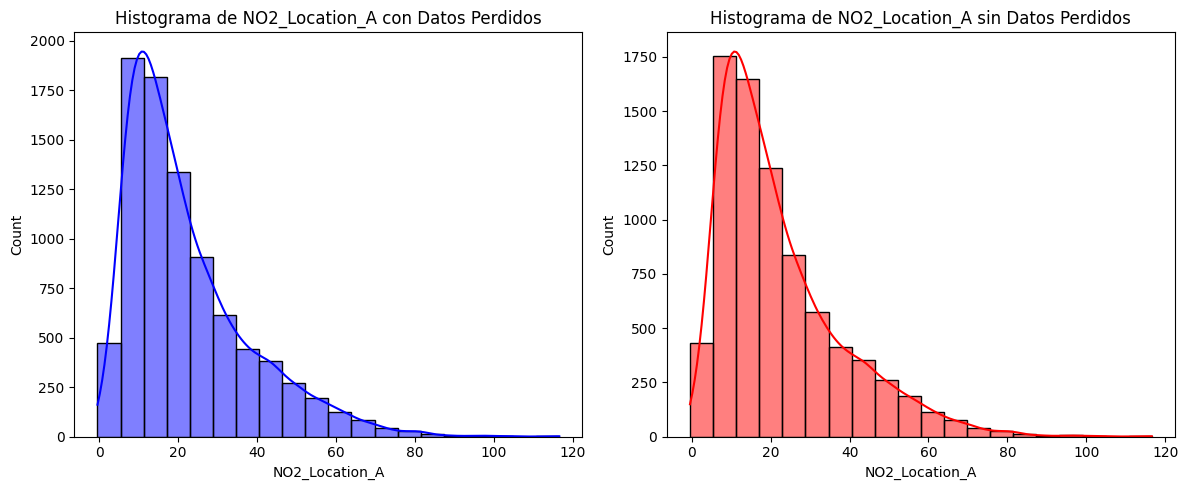

In [ ]:
# Crear dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma para la columna con datos perdidos
sns.histplot(df['NO2_Location_A'], bins=20, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Histograma de NO2_Location_A con Datos Perdidos")

# Histograma para la columna sin datos perdidos
sns.histplot(df_sin_nulos['NO2_Location_A'], bins=20, kde=True, ax=axes[1], color="red")
axes[1].set_title("Histograma de NO2_Location_A sin Datos Perdidos")

plt.tight_layout()
plt.show()

Vamos a utilizar un boxplot.

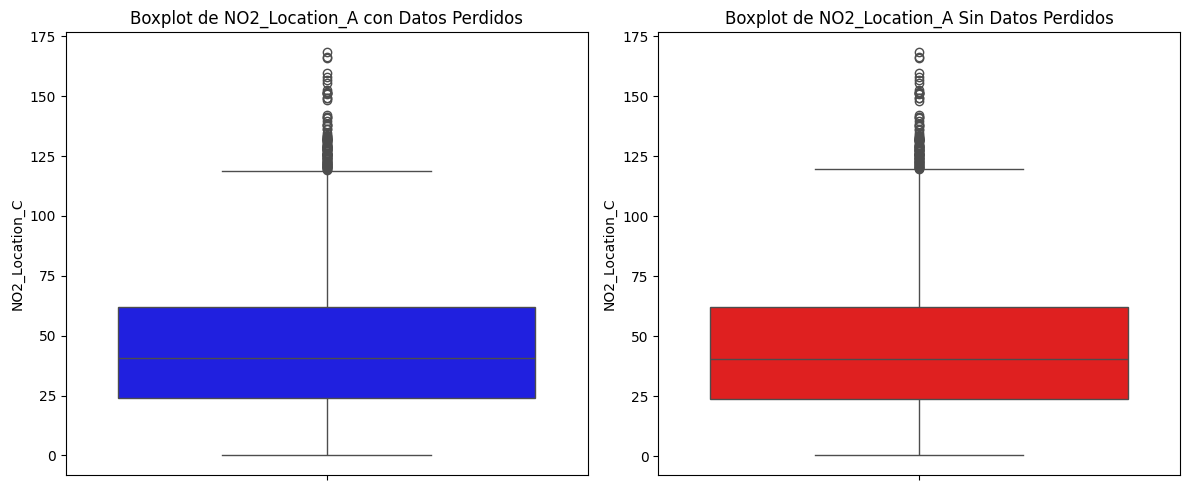

In [ ]:
# Crear dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot para la columna A
sns.boxplot(y=df['NO2_Location_C'], ax=axes[0], color="blue")
axes[0].set_title("Boxplot de NO2_Location_A con Datos Perdidos")

# Boxplot para la columna B
sns.boxplot(y=df_sin_nulos['NO2_Location_C'], ax=axes[1], color="red")
axes[1].set_title("Boxplot de NO2_Location_A Sin Datos Perdidos")

plt.tight_layout()
plt.show()

### Práctica

**Usa el conjunto de datos health_nutrition** que cargaste anteriormente. Realiza lo siguiente:



*   Emplea `dropna(axis=1)` y observa lo que sucede.

* Emplea `dropna(axis=0)`y observa lo que sucede.

*  Debido a que hay columnas totalmente vacias y otras con un gran porcentaje de datos perdidos procederemos a realizar lo siguiente:

1. Emplea `dropna(axis=1, how = 'all')`. Esto eliminará todas las columnas donde **todos** sus elementos son NaN. Guarda este nuevo conjunto de datos en otra variable

2. En el conjunto de datos anterior, el que obtuviste del paso 1, debido a que varias columnas tienen muchos datos perdidos, si eliminamos por fila el conjunto se reducidirá. Por ello, procederemos a eliminar por filas usando un umbral. Elige un valor de `n`y emplea sobre el conjunto anterior  `dropna(axis=1,thresh=n)`. Esto eliminará datos perdidos tomando como información solo la cantidad de datos perdidos de las columnas y teniendo en cuenta el umbral. Guarda el resultado de este nuevo conjunto.

3. Al conjunto resultante del paso 2, aplica la eliminación por filas. Puedes usar `dropna()`.

4. Elige algunas columnas del conjunto original y que aparecen en el conjunto resultante del paso 3 e imprime su histograma, boxplot para ver los efectos que tienen una imputación tan agresiva. Prueba con varias columnas.



## Imputación con Técnicas Estadísticas

El método `.fillna()` en Pandas se usa para rellenar los valores nulos con un valor específico o con valores derivados de otros métodos. Este método recibe el nombre de imputación por reemplazo

Podemos sustituir los valores perdidos con la media, mediana y la moda. También con un valor directo. Veamos un ejemplo sencillo

In [ ]:
# Creación de un DataFrame de ejemplo con datos faltantes
df_toy = pd.DataFrame({
    'Nombre': ['Ana', 'Luis', 'María', 'Carlos', 'Elena'],
    'Edad': [25, np.nan, 30, 22, np.nan],
    'Salario': [50000, 54000, np.nan, 45000, 52000],
    'Ciudad': ['Madrid', np.nan, 'Barcelona', 'Sevilla', 'Bilbao']
})


print(df_toy)
# Contar valores nulos en cada columna
df_toy.isnull().sum()

# Rellenar valores nulos con valores estadísticos específicos
df_imp= df_toy.fillna({'Edad': df_toy['Edad'].median(), 'Salario': df_toy['Salario'].median(), 'Ciudad': 'No Aplica'})


print(df_imp)
# Contar valores nulos en cada columna
df_imp.isnull().sum()

   Nombre  Edad  Salario     Ciudad
0     Ana  25.0  50000.0     Madrid
1    Luis   NaN  54000.0        NaN
2   María  30.0      NaN  Barcelona
3  Carlos  22.0  45000.0    Sevilla
4   Elena   NaN  52000.0     Bilbao
   Nombre  Edad  Salario     Ciudad
0     Ana  25.0  50000.0     Madrid
1    Luis  25.0  54000.0  No Aplica
2   María  30.0  51000.0  Barcelona
3  Carlos  22.0  45000.0    Sevilla
4   Elena  25.0  52000.0     Bilbao


,0
Nombre,0
Edad,0
Salario,0
Ciudad,0


Vamos a aplicar las técnicas antes vistas el conjunto  de datos de Airdata. Emplearemos la media y mediana en las columnas con datos perdidos.

- NO2_Location_A
- NO2_Location_B
- NO2_Location_C

Después de la imputación imprimimos la inforamción para verificar el número de filas. Todas las columnas deberían tener el mismo número de elementos no-nulos.

Posteriormente dibujaremos los histogramas y boxplot para verificar si hubo algún cambio.


In [ ]:

print("\nInformación del conjunto de datos original")
print(df.info())

df_media = df.fillna({'NO2_Location_A': df['NO2_Location_A'].mean(),
                              'NO2_Location_B': df['NO2_Location_B'].mean(),
                              'NO2_Location_C': df['NO2_Location_C'].mean()})

print("\nInformación del conjunto de datos con imputación directa media")
print(df_media.info())


Información del conjunto de datos original
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DateTime        8784 non-null   object 
 1   Temperature     8784 non-null   float64
 2   Humidity        8784 non-null   int64  
 3   Wind_Speed      8784 non-null   float64
 4   Wind_Direction  8784 non-null   float64
 5   NO2_Location_A  8664 non-null   float64
 6   NO2_Location_B  8204 non-null   float64
 7   NO2_Location_C  8652 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 549.1+ KB
None

Información del conjunto de datos con imputación directa media
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DateTime        8784 non-null   object 
 1   Temperature     8784 

Vamos a mostrar gráficos para ver los resultados de la imputación usando la media. Posterioremente cambia a la mediana y observa los posibles cambios.

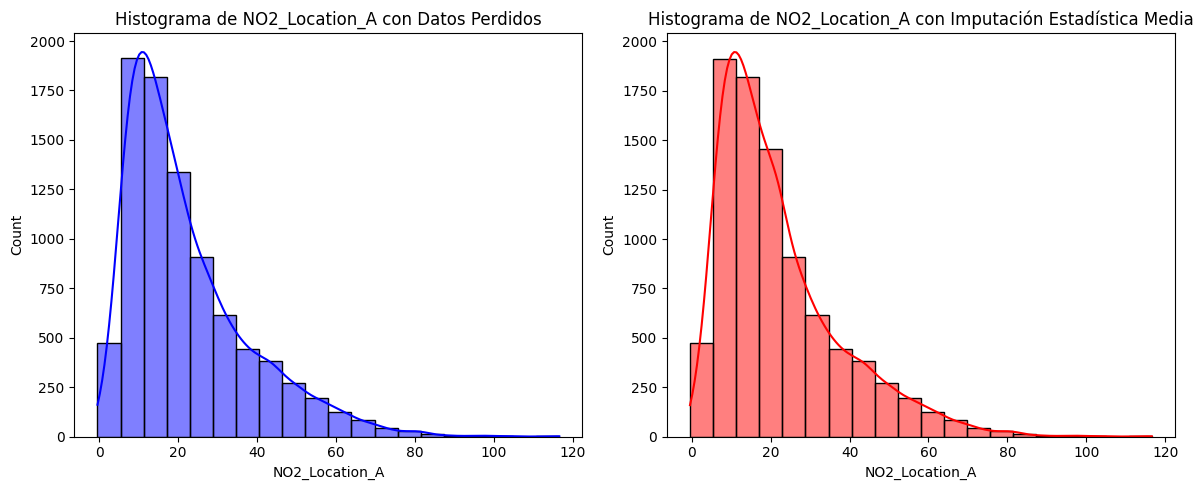

In [ ]:
# Crear dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma para la columna con datos perdidos
sns.histplot(df['NO2_Location_A'], bins=20, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Histograma de NO2_Location_A con Datos Perdidos")

# Histograma para la columna sin datos perdidos
sns.histplot(df_media['NO2_Location_A'], bins=20, kde=True, ax=axes[1], color="red")
axes[1].set_title("Histograma de NO2_Location_A con Imputación Estadística Media")

plt.tight_layout()
plt.show()

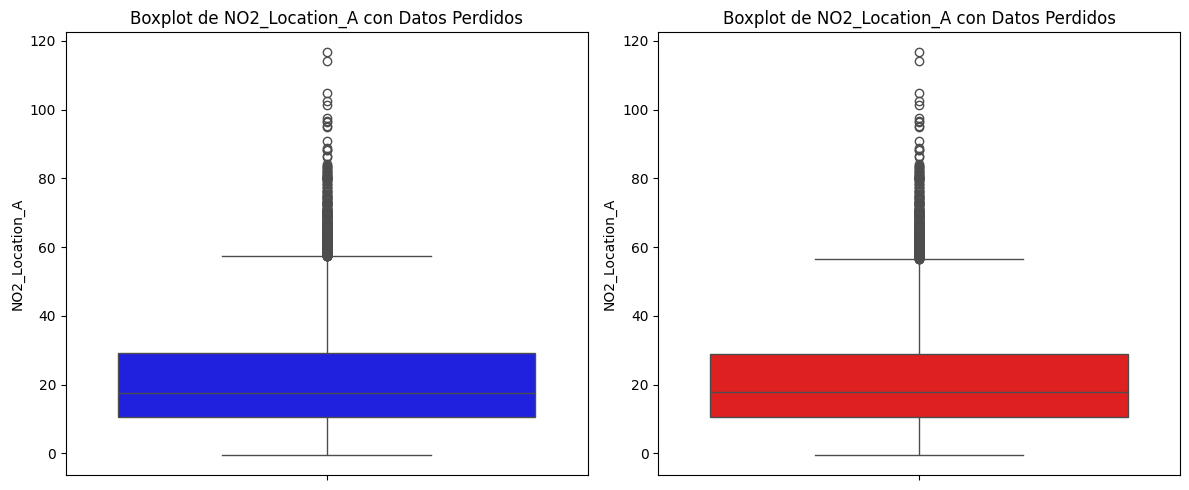

In [ ]:
# Crear dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot para la columna A
sns.boxplot(y=df['NO2_Location_A'], ax=axes[0], color="blue")
axes[0].set_title("Boxplot de NO2_Location_A con Datos Perdidos")

# Boxplot para la columna B
sns.boxplot(y=df_media['NO2_Location_A'], ax=axes[1], color="red")
axes[1].set_title("Boxplot de NO2_Location_A con Datos Perdidos")

plt.tight_layout()
plt.show()

Ahora con la mediana

In [ ]:
print("\nInformación del conjunto de datos original")
print(df.info())

df_mediana = df.fillna({'NO2_Location_A': df['NO2_Location_A'].median(),
                              'NO2_Location_B': df['NO2_Location_B'].median(),
                              'NO2_Location_C': df['NO2_Location_C'].median()})

print("\nInformación del conjunto de datos con imputación directa mediana")
print(df_mediana.info())


Información del conjunto de datos original
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DateTime        8784 non-null   object 
 1   Temperature     8784 non-null   float64
 2   Humidity        8784 non-null   int64  
 3   Wind_Speed      8784 non-null   float64
 4   Wind_Direction  8784 non-null   float64
 5   NO2_Location_A  8664 non-null   float64
 6   NO2_Location_B  8204 non-null   float64
 7   NO2_Location_C  8652 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 549.1+ KB
None

Información del conjunto de datos con imputación directa mediana
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DateTime        8784 non-null   object 
 1   Temperature     878

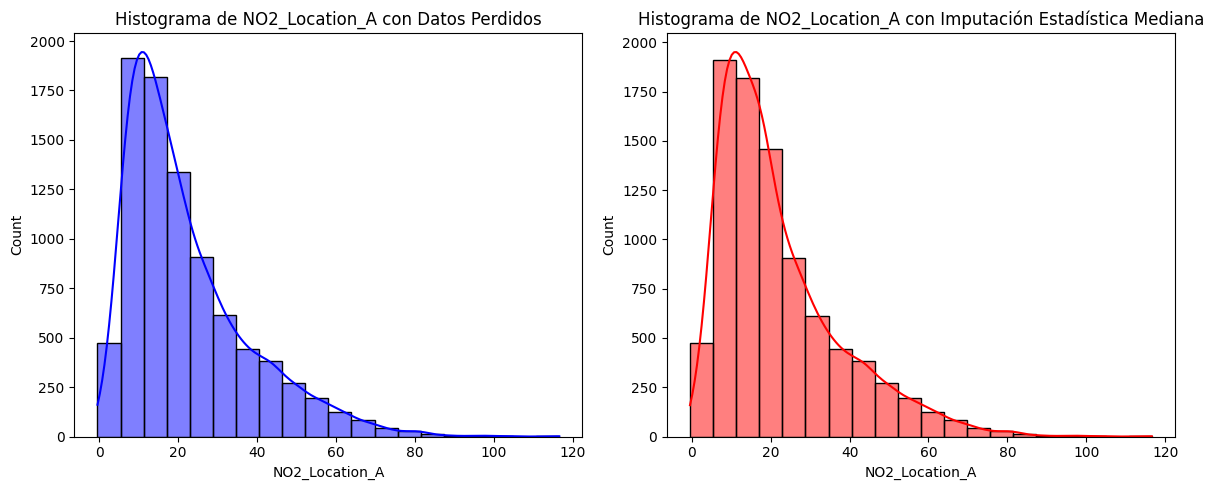

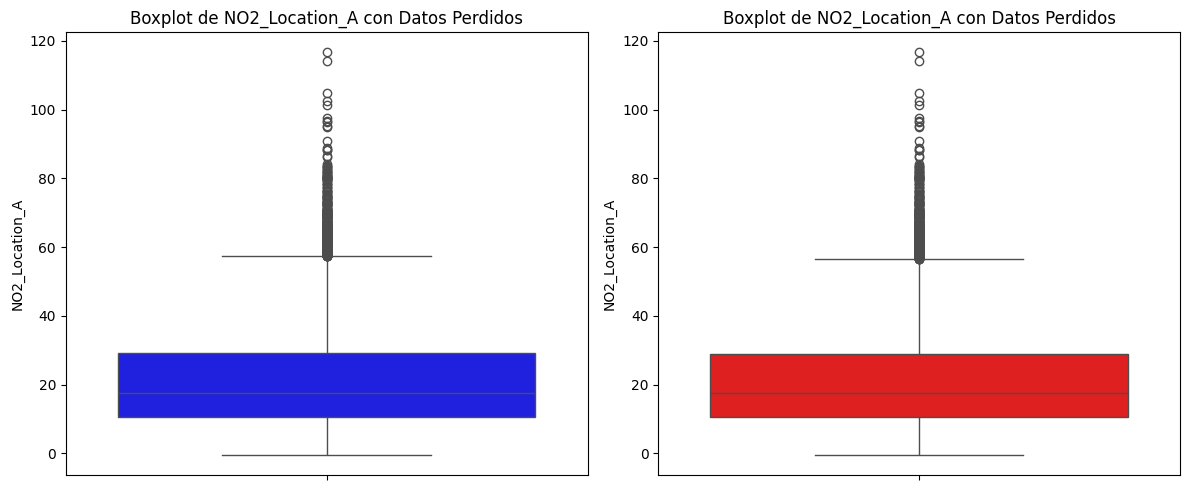

In [ ]:
# Crear dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma para la columna con datos perdidos
sns.histplot(df['NO2_Location_A'], bins=20, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Histograma de NO2_Location_A con Datos Perdidos")

# Histograma para la columna sin datos perdidos
sns.histplot(df_mediana['NO2_Location_A'], bins=20, kde=True, ax=axes[1], color="red")
axes[1].set_title("Histograma de NO2_Location_A con Imputación Estadística Mediana")

plt.tight_layout()
plt.show()


# Crear dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot para la columna A
sns.boxplot(y=df['NO2_Location_A'], ax=axes[0], color="blue")
axes[0].set_title("Boxplot de NO2_Location_A con Datos Perdidos")

# Boxplot para la columna B
sns.boxplot(y=df_mediana['NO2_Location_A'], ax=axes[1], color="red")
axes[1].set_title("Boxplot de NO2_Location_A con Datos Perdidos")

plt.tight_layout()
plt.show()

### Práctica
Utiliza el conjunto de datos health_nutrition y observa lo que sucede.

## Imputación con Métodos Forward-Fill y Backward-Fill

Cuando trabajamos con datos faltantes en series temporales, una de las estrategias más simples es la imputación por propagación de valores:

* Forward Fill (ffill) → Rellena los valores NaN con el último valor conocido hacia adelante.
* Backward Fill (bfill) → Rellena los valores NaN con el siguiente valor conocido hacia atrás.

# Valores perdidos en datos categóricos

En datos categóricos, los valores faltantes (NaN) no pueden llenarse con promedios o medianas, por lo que usamos estrategias como:

* Imputación con la moda (valor más frecuente).
* Imputación con un valor fijo ("Desconocido", "Otro", etc.).


In [ ]:
import pandas as pd
import numpy as np

# Crear un DataFrame con valores categóricos y algunos NaN
dfcat = pd.DataFrame({
    'ID': [1, 2, 3, 4, 5, 6],
    'Ciudad': ['Madrid', np.nan, 'Barcelona', 'Sevilla', np.nan, 'Madrid']
})


print(dfcat.dtypes)
dfcat['Ciudad'] = dfcat['Ciudad'].astype('category')
print(dfcat.dtypes)

print("\nDataFrame original:")
print(dfcat)

# Imputar valores faltantes con la moda
moda_ciudad = dfcat['Ciudad'].mode()[0]  # Obtiene el valor más frecuente
print("\nLa moda es: ", moda_ciudad)
dfcat['Ciudad'] = dfcat['Ciudad'].fillna(moda_ciudad)

print("\nDataFrame después de imputar con la moda:")
print(dfcat)


ID         int64
Ciudad    object
dtype: object
ID           int64
Ciudad    category
dtype: object

DataFrame original:
   ID     Ciudad
0   1     Madrid
1   2        NaN
2   3  Barcelona
3   4    Sevilla
4   5        NaN
5   6     Madrid

La moda es:  Madrid

DataFrame después de imputar con la moda:
   ID     Ciudad
0   1     Madrid
1   2     Madrid
2   3  Barcelona
3   4    Sevilla
4   5     Madrid
5   6     Madrid


## Sugerencias

**Imputación por media**


*   Usos: Datos normalmente distribuidos y los valores perdidos son MCAR o MAR
*   Ventajas: Fácil y sencillo de implementar. Preserva la media de la distribución

* Desventaja: Sensible a outliers y podría cambiar la distribución de los datos

**Imputación por Mediana**

*   Usos: Datos sesgados o no distribuidos normalmente. Así con datos que contienen outliers
*   Ventajas: Robusto a outliers, preserva la mediana de la distribución

* Desventaja: Ignora relaciones potenciales entre variables y podría ser menos preciso en datos no sesgados

**Imputación por Filas**

*   Usos: MCAR o MAR, así como en la presencia de outliers
*   Ventajas: Preserva la estructura de los datos, puede ser efectivo cuando es totalmente aleatorio

* Desventaja: Reduce el conjunto de datos y podríamos obtener conclusiones sesgadas si los datos perdidos no son totalmente aleatorios.

